Multicollinearity

In [45]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

1. Definition

If there are more than two variables are correlated in systematic ways, it is called multicollinearity. It is often investigated by analysing the correlation matrix of the variables. 

2. Description:

Multicolinearity is a phenonmenon that the independent variables are highly correlated, which results in less accurate statistical inference. Two variables are perfectly collinear if the correlation coefficients are +1 or -1. Once the independence variables are highly correlated, the standard errors, covariances of the coefficients, and the variances from the regression model tend to be bigger, which leads to a wider confidence intervals fo the coefficient estimates. This results in the model predictions being less precise.

3. Demonstration:

In [46]:
# import libraries
file_path = 'boston.csv.xls'
df = pd.read_csv(file_path)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [39]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

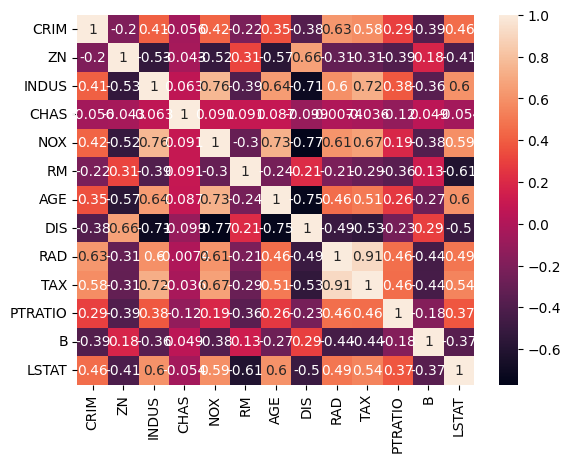

In [47]:
# collect the independt variables
data = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
c = data.corr()
sns.heatmap(c, annot=True)
plt.show()

In [48]:
#  Regression Model with ten Independent Variables
model_1 = smf.ols(
    "MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT",
    data=df,
).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          6.72e-135
Time:                        22:55:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusion: 

In the above results, we can see some independent variable estimates are not significant (p-values are larger than 0.05). In the correlation heatmap, for example. for independent variable INDUS, it is easy to be witnessed that it has higher correlation with many other independent variables. Among the p value of all the independent varable, you can see INDUS's p value is not statistically significant. In this case, it means the estimate of the coeffcient will be less precised as its SE is also quite high compared to its coefficient.

Solutions

1. drop independent variables that have high correlation

2. treat one of the independent variables in the model as a dependent variable and run a regression with the rest of the independent variables

3. principal component analysis 

Solution 1. - not working

In [54]:
# Parameters with high precision
#  Regression Model with ten Independent Variables
model_1 = smf.ols(
    "MEDV ~ CRIM + ZN + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT",
    data=df,
).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          6.42e-136
Time:                        22:57:28   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3639      5.091      7.143      0.000      26.361      46.366
CRIM          -0.1084      0.033     -3.304      0.001      -0.173      -0.044
ZN             0.0459      0.014      3.368      0.001       0.019       0.073
CHAS           2.7164      0.856      3.173      0.002       1.034       4.399
NOX          -17.4295      3.681     -4.735      0.000     -24.662     -10.197
RM             3.7970      0.416      9.132      0.000       2.980       4.614
AGE            0.0007      0.013      0.053      0.958      -0.025       0.027
DIS           -1.4896      0.195     -7.648      0.000      -1.872      -1.107
RAD            0.2999      0.064      4.710      0.000       0.175       0.425
TAX           -0.0118      0.003     -3.489      0.001      -0.018      -0.005
PTRATIO       -0.9471      0.130     -7.308      0.000      -1.202      -0.692
B              0.0093      0.003      3.461      0.001       0.004       0.015
LSTAT         -0.5235      0.051    -10.361      0.000      -0.623      -0.424
==============================================================================
Omnibus:                      178.124   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              784.481
Skew:                           1.521   Prob(JB):                    4.49e-171
Kurtosis:                       8.287   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusion: Dropping one of the highly correlated independent variables did not make a big change to the model output as its adjust R square remains the same but its R square shrink 2 basis points. All the other independts have been tested for being dropped. None of them provided improvement for the modeling output.

Solution 2:

In [58]:
#  Regression Model with ten Independent Variables
model_1 = smf.ols(
    " INDUS ~ CRIM + ZN + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT",
    data=df,
).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     120.5
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          4.20e-132
Time:                        22:58:43   Log-Likelihood:                -1362.1
No. Observations:                 506   AIC:                             2748.
Df Residuals:                     494   BIC:                             2799.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0863      3.726      0.560      0.576      -5.234       9.406
CRIM          -0.0645      0.024     -2.695      0.007      -0.112      -0.017
ZN            -0.0186      0.010     -1.795      0.073      -0.039       0.002
CHAS           1.1094      0.651      1.705      0.089      -0.169       2.388
NOX           15.1091      2.799      5.399      0.000       9.610      20.608
RM            -1.0014      0.311     -3.219      0.001      -1.613      -0.390
AGE            0.0052      0.010      0.515      0.606      -0.015       0.025
DIS           -0.7267      0.148     -4.898      0.000      -1.018      -0.435
TAX            0.0145      0.002      8.842      0.000       0.011       0.018
PTRATIO        0.1783      0.098      1.828      0.068      -0.013       0.370
B             -0.0006      0.002     -0.304      0.761      -0.005       0.003
LSTAT          0.0592      0.039      1.538      0.125      -0.016       0.135
==============================================================================
Omnibus:                      141.325   Durbin-Watson:                   0.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              365.926
Skew:                           1.386   Prob(JB):                     3.47e-80
Kurtosis:                       6.111   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The variance inflation factor (VIF) is used to determine if an independent variable has a multicollinearity issue.

In [56]:
labels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

variables = model_1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

pd.DataFrame(vif[1:], labels[1:], columns=["VIF"])

,VIF
ZN,1.789724
INDUS,2.272761
CHAS,1.062600
NOX,4.087564
RM,1.917402
AGE,3.100822
DIS,3.779656
RAD,6.904480
TAX,7.280729
PTRATIO,1.768721


We observe that the variables RAD and TAX have variance inflation factor (VIF) values exceeding 5, indicating significant multicollinearity. Given this high multicollinearity, it's essential to investigate these variables further and consider removing them from the model.